In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import defaultdict, Counter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
Rating=pd.read_csv('Reviews.csv',encoding='latin-1')
Rating.head()

,Unnamed: 0,Ratings,Full_review
0,0,5,This is the best laptop in this range.I reciev...
1,1,5,Good product as used of now.... Everything is ...
2,2,5,AWESOME LAPTOP. It supports many high spec gam...
3,3,4,For that price... it's exceptionally good. Pla...
4,4,4,RAM upgrade is must do because the useable RAM...


In [4]:
#dropping the Unnamed: 0 column
Rating.drop('Unnamed: 0', axis =1, inplace = True)

In [5]:
print('shape = >',Rating.shape)

shape = > (15872, 2)


Observation:

There are 15872 rows and 2 columns present in our dataset.

In [6]:
print('Rating counts','\n',Rating.Ratings.value_counts())

Rating counts 
 5    8517
4    3136
1    2110
3    1393
2     716
Name: Ratings, dtype: int64


In [7]:
def plot_labels(Rating, title=None):
  ds_labels = Rating["Ratings"].value_counts(normalize=True)
  ds_labels.sort_index(inplace=True)
  plt.figure(figsize=(4,3))
  ax = ds_labels.plot(kind="bar")
  ax.set_xlabel("Stars")
  ax.set_ylabel("Ratio")
  if title is not None:
    plt.savefig(title + ".eps")
  plt.show()

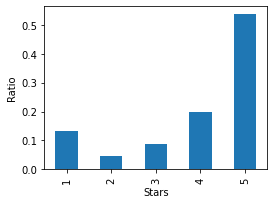

In [8]:
plot_labels(Rating, "stars")

We can observe that the dataset is imbalanced.

In [9]:
Rating['length']=Rating.Full_review.str.len()
Rating.head()

,Ratings,Full_review,length
0,5,This is the best laptop in this range.I reciev...,500
1,5,Good product as used of now.... Everything is ...,271
2,5,AWESOME LAPTOP. It supports many high spec gam...,96
3,4,For that price... it's exceptionally good. Pla...,342
4,4,RAM upgrade is must do because the useable RAM...,502


Here we create another column length based on the length of reviews.

In [10]:
Rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15872 entries, 0 to 15871
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ratings      15872 non-null  int64 
 1   Full_review  15872 non-null  object
 2   length       15872 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 372.1+ KB


In [12]:
Rating.isnull().sum()

Ratings        0
Full_review    0
length         0
dtype: int64

<AxesSubplot:>

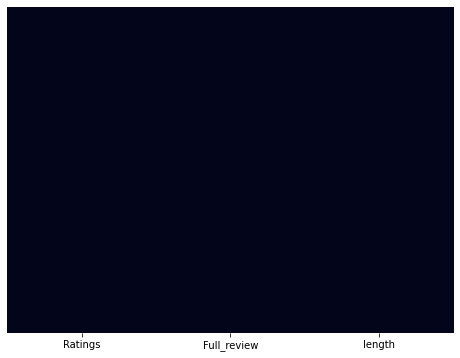

In [13]:
#Visualizing missing values if any through heatmap
plt.figure(figsize=(8,6))
sns.heatmap(Rating.isnull(),yticklabels=False,cbar=False)

Observation:

Thus we confirm that there are no missing values present in our dataset.

In [14]:
#convert text to lowercase
Rating['Full_review']=Rating['Full_review'].str.lower()

In [15]:
Rating['Full_review']=Rating['Full_review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'£|\$', 'dollers')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

Rating['Full_review']=Rating['Full_review'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [16]:
#remove punctuation
Rating['Full_review']=Rating['Full_review'].str.replace(r'[^\w\d\s]', ' ')

#replace whitespace between terms with a single space
Rating['Full_review']=Rating['Full_review'].str.replace(r'\s+', ' ')

#Remove leading and trailing whitespace
Rating['Full_review']=Rating['Full_review'].str.replace(r'^\s+|\s+?$', '')

In [17]:
Rating.head()

,Ratings,Full_review,length
0,5,this is the best laptop in this range i reciev...,500
1,5,good product as used of now everything is good...,271
2,5,awesome laptop it supports many high spec game...,96
3,4,for that price it s exceptionally good played ...,342
4,4,ram upgrade is must do because the useable ram...,502


In [19]:
#Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

In [21]:
Rating['clean_length'] = Rating.Full_review.str.len()

In [22]:
Rating.head()

,Ratings,Full_review,length,clean_length
0,5,this is the best laptop in this range i reciev...,500,506
1,5,good product as used of now everything is good...,271,252
2,5,awesome laptop it supports many high spec game...,96,97
3,4,for that price it s exceptionally good played ...,342,335
4,4,ram upgrade is must do because the useable ram...,502,520


In [23]:
print('original Review length', Rating.length.sum())
print('clean Review length', Rating.clean_length.sum())

original Review length 1221088
clean Review length 1202023


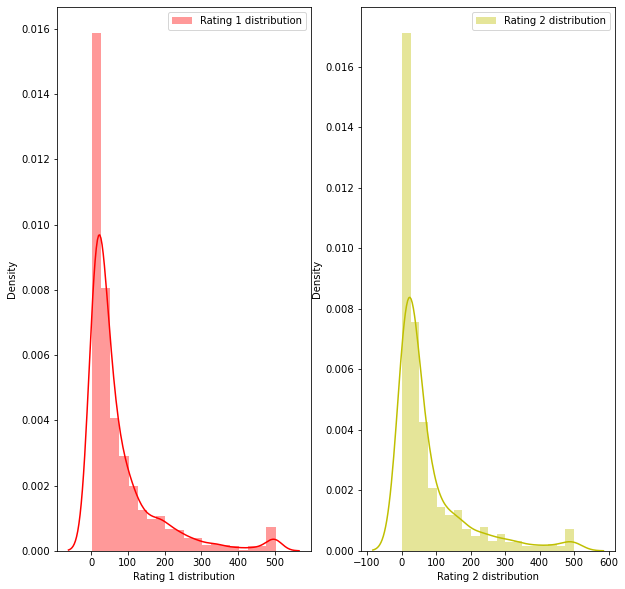

In [24]:
#message distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==2]['length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

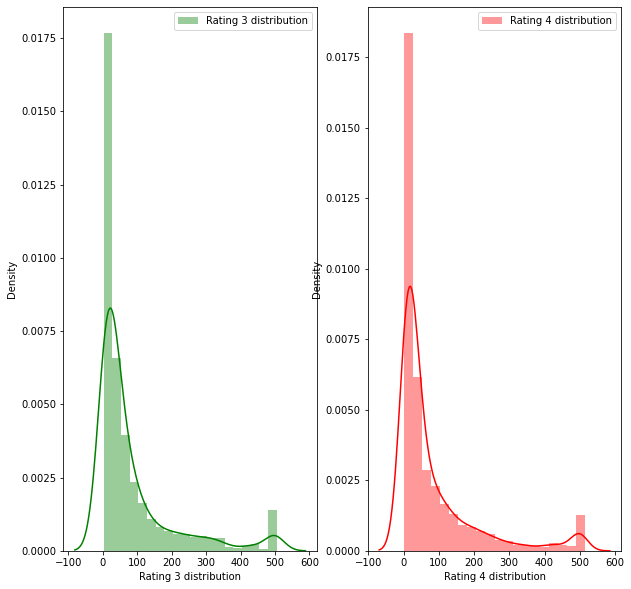

In [25]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==3]['length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='g')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==4]['length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

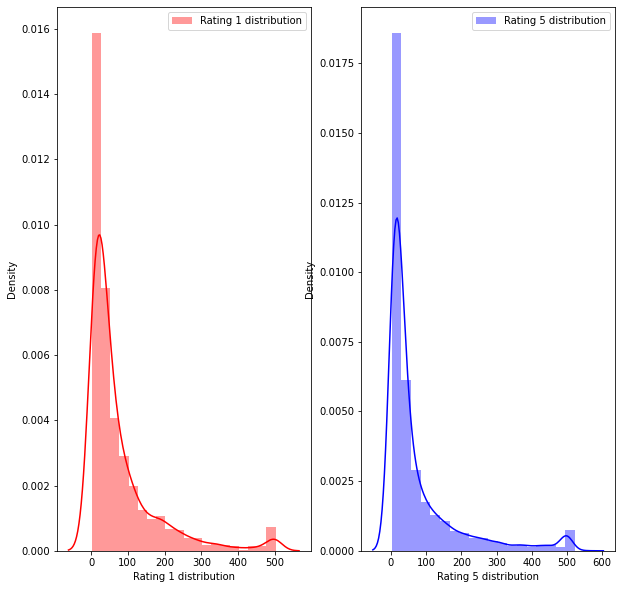

In [26]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==5]['length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

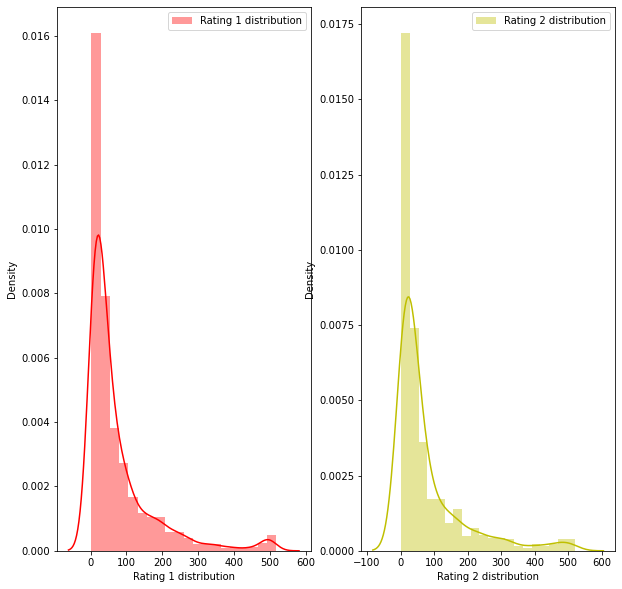

In [27]:
#message distribution after cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==2]['clean_length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

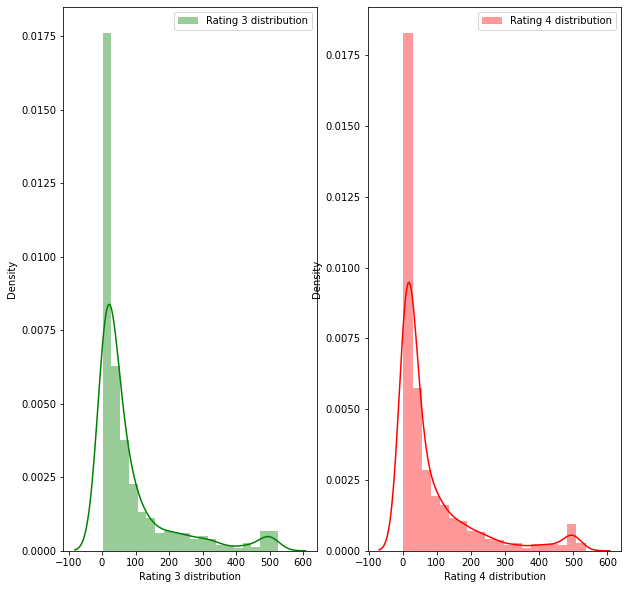

In [28]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==3]['clean_length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='g')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==4]['clean_length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

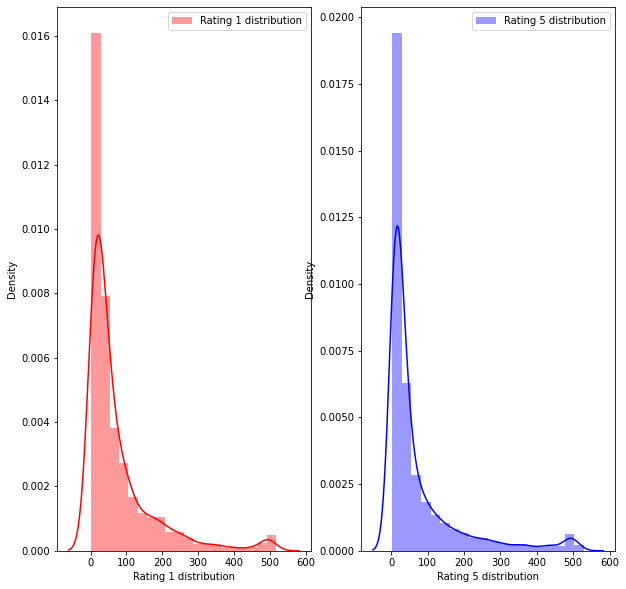

In [29]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==5]['clean_length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec=TfidfVectorizer()
feature1=tf_vec.fit_transform(Rating['Full_review'])

In [35]:
x=feature1

In [36]:
y=Rating['Ratings']

In [37]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=9)

In [39]:
#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Importing Boosting models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [40]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)
XGB=XGBClassifier()
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()

In [41]:
models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
models.append(('XGBClassifier', XGB))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))

****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.4932283464566929


Cross_Val_Score =  0.4677312436214266


classification_report
               precision    recall  f1-score   support

           1       0.30      0.26      0.28       400
           2       0.07      0.01      0.02       155
           3       0.20      0.06      0.09       304
           4       0.24      0.11      0.15       625
           5       0.57      0.81      0.67      1691

    accuracy                           0.49      3175
   macro avg       0.28      0.25      0.24      3175
weighted avg       0.41      0.49      0.43      3175



[[ 103    3   12   29  253]
 [  32    2    6   18   97]
 [  36    4   18   32  214]
 [  52    7   19   70  477]
 [ 124   11   35  148 1373]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** DecisionTreeCl

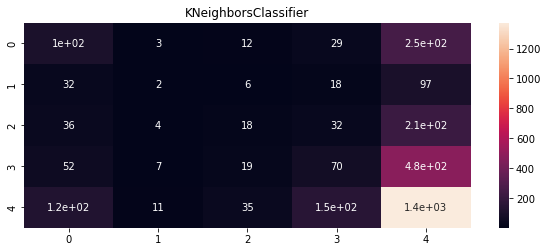

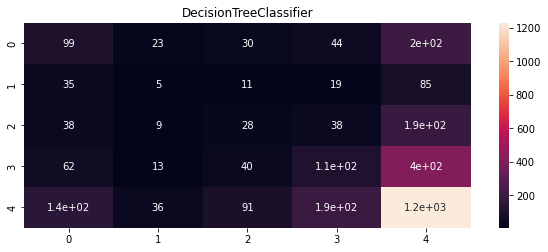

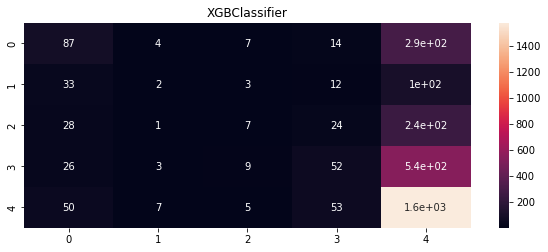

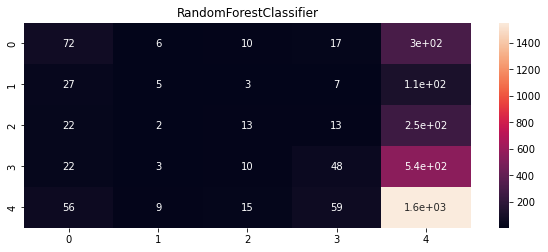

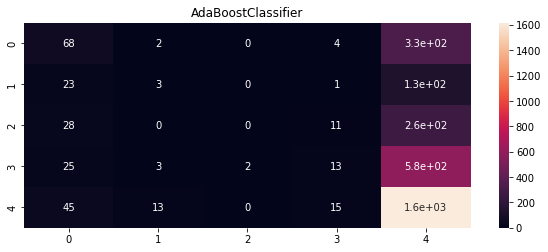

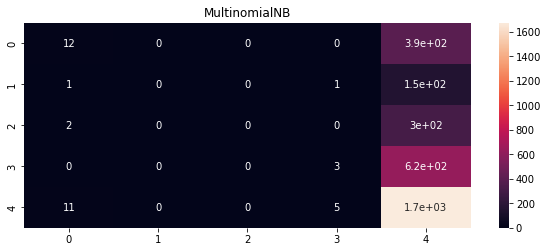

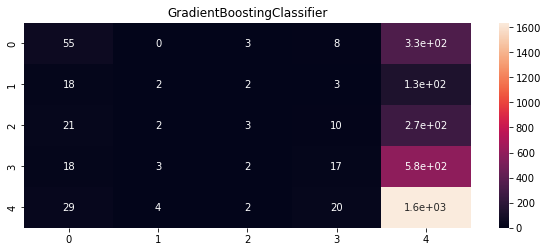

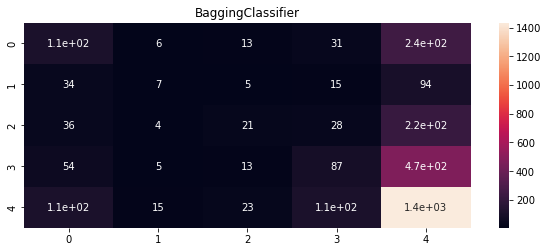

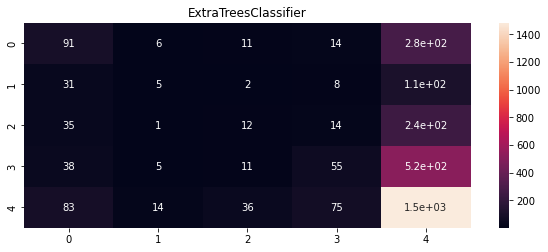

In [47]:
Model= []
score= []
cvs=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc= cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')

In [48]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,49.322835,46.773124
1,DecisionTreeClassifier,46.236220,44.316003
2,XGBClassifier,54.299213,52.462629
3,RandomForestClassifier,53.228346,50.956838
4,AdaBoostClassifier,53.606299,53.445787
5,MultinomialNB,53.228346,53.502978
6,GradientBoostingClassifier,53.952756,53.534003
7,BaggingClassifier,52.157480,49.091743
8,ExtraTreesClassifier,51.842520,49.520248


## Using gridsearch cv to find the best parameters in random forest

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth': [80, 90, 100], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]}
rfc=RandomForestClassifier()

clf=GridSearchCV(rfc,parameters,cv=5,n_jobs=-1)
clf.fit(x_train,y_train)
print(clf.best_params_)

In [ ]:
#RandomForesetClassifier with best parameters

rfc=RandomForestClassifier(max_depth=100, min_samples_leaf=3, min_samples_split=8, n_estimators=1000)
rfc.fit(x_train_ns,y_train_ns)
rfc.score(x_train_ns,y_train_ns)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

## Random forest classifier is giving us best results so we save it as our final model.

In [ ]:
#saving our model

import joblib
joblib.dump(RF,'Ratings_prediction.csv')